# 201543122 김기범 - 비즈니스데이터마이닝 092분반
# 실습과제 1

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
import statsmodels.api as sm

In [32]:
df = pd.read_csv('c:/bd092_data/mtcars_hw.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6.0,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6.0,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4.0,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6.0,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8.0,360.0,175,3.15,3.440,17.02,0,0,3,2


In [33]:
df.info() #cyl, drat, qsec null값 발견됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     29 non-null     float64
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    29 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    29 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


In [34]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,29.000000,32.000000,32.000000,29.000000,32.000000,29.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.275862,230.721875,146.687500,3.563103,3.217250,17.824138,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.750440,123.938694,68.562868,0.551492,0.978457,1.795603,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.900000,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.620000,3.325000,17.600000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.900000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


# 1) null값 평균값으로 대체하기 

In [35]:
#1. null 값 평균값으로 대체하기 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     29 non-null     float64
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    29 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    29 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


In [37]:
#cyl, drat, qsec null값 발견됨
df['cyl'] = df['cyl'].fillna(df['cyl'].mean())
df.info()
#cyl null값 --> 평균값으로 대체
df.describe()
#cyl 평균값도 변함 없음 (변화 없어야 함)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     float64
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    29 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    29 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,29.000000,32.000000,29.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.275862,230.721875,146.687500,3.563103,3.217250,17.824138,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.663586,123.938694,68.562868,0.551492,0.978457,1.795603,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.900000,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.137931,196.300000,123.000000,3.620000,3.325000,17.600000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.900000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [38]:
#drat, qsec null값 발견됨
df['drat'] = df['drat'].fillna(df['drat'].mean())
df.info() # drat 값도 null값 평균값으로 대체
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     float64
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    29 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,29.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.275862,230.721875,146.687500,3.563103,3.217250,17.824138,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.663586,123.938694,68.562868,0.524128,0.978457,1.795603,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.900000,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.137931,196.300000,123.000000,3.563103,3.325000,17.600000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.900000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [59]:
#qsec null값 발견됨
df['qsec'] = df['qsec'].fillna(df['qsec'].mean())
df.info() #전체 32개 레코드 중 null값 모두 평균값으로 대체 완료.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     float64
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  facility  32 non-null     int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 2.9+ KB


# 2) facility = gear + carb 변수 합 저장하기 

In [60]:
# 2). facility = gear + carb 변수 합 저장하기 
df['facility'] = df['gear']+df['carb']
df.head() #facility 칼럼 추가 완료

KeyError: 'gear'

# 3) gear와 carb 칼럼은 데이터셋에서 제외하기 

In [61]:
# 3). gear와 carb 칼럼은 데이터셋에서 제외하기 
df.drop('gear', axis=1, inplace=True)
#이미 삭제 되었는데 여러번 삭제 명령 들어와서 KEY ERROR 발생함. 

KeyError: "['gear'] not found in axis"

In [62]:
df.drop('carb', axis=1, inplace=True)
#마찬가지로 이미 삭제했는데 계속 삭제 명령 들어와서 KEY ERROR 발생함. 

KeyError: "['carb'] not found in axis"

In [63]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,facility
0,Mazda RX4,21.0,6.0,160.0,110,3.90,2.620,16.46,0,1,8
1,Mazda RX4 Wag,21.0,6.0,160.0,110,3.90,2.875,17.02,0,1,8
2,Datsun 710,22.8,4.0,108.0,93,3.85,2.320,18.61,1,1,5
3,Hornet 4 Drive,21.4,6.0,258.0,110,3.08,3.215,19.44,1,0,4
4,Hornet Sportabout,18.7,8.0,360.0,175,3.15,3.440,17.02,0,0,5


In [86]:
#df 이름을 df1으로 바꾸기 
df1 = df
df1
#df1 새로운 데이터셋 생성완료.
#'수정완료하고 새로운 데이터셋 이름을 df1으로 하라'는 의미로 주어진 제시문을 이해해서 
#처음 불러올때는 df, 마지막에 수정완료된 테이블은 df1으로 설정하였습니다.

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,facility
0,Mazda RX4,21.0,6.000000,160.0,110,3.900000,2.620,16.460000,0,1,8
1,Mazda RX4 Wag,21.0,6.000000,160.0,110,3.900000,2.875,17.020000,0,1,8
2,Datsun 710,22.8,4.000000,108.0,93,3.850000,2.320,18.610000,1,1,5
3,Hornet 4 Drive,21.4,6.000000,258.0,110,3.080000,3.215,19.440000,1,0,4
4,Hornet Sportabout,18.7,8.000000,360.0,175,3.150000,3.440,17.020000,0,0,5
5,Valiant,18.1,6.000000,225.0,105,2.760000,3.460,20.220000,1,0,4
6,Duster 360,14.3,6.275862,360.0,245,3.210000,3.570,17.824138,0,0,7
7,Merc 240D,24.4,6.275862,146.7,62,3.690000,3.190,20.000000,1,0,6
8,Merc 230,22.8,6.275862,140.8,95,3.563103,3.150,22.900000,1,0,6
9,Merc 280,19.2,6.000000,167.6,123,3.563103,3.440,18.300000,1,0,8


In [87]:
df1.describe()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     float64
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  facility  32 non-null     int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 2.9+ KB


In [88]:
df1

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,facility
0,Mazda RX4,21.0,6.000000,160.0,110,3.900000,2.620,16.460000,0,1,8
1,Mazda RX4 Wag,21.0,6.000000,160.0,110,3.900000,2.875,17.020000,0,1,8
2,Datsun 710,22.8,4.000000,108.0,93,3.850000,2.320,18.610000,1,1,5
3,Hornet 4 Drive,21.4,6.000000,258.0,110,3.080000,3.215,19.440000,1,0,4
4,Hornet Sportabout,18.7,8.000000,360.0,175,3.150000,3.440,17.020000,0,0,5
5,Valiant,18.1,6.000000,225.0,105,2.760000,3.460,20.220000,1,0,4
6,Duster 360,14.3,6.275862,360.0,245,3.210000,3.570,17.824138,0,0,7
7,Merc 240D,24.4,6.275862,146.7,62,3.690000,3.190,20.000000,1,0,6
8,Merc 230,22.8,6.275862,140.8,95,3.563103,3.150,22.900000,1,0,6
9,Merc 280,19.2,6.000000,167.6,123,3.563103,3.440,18.300000,1,0,8


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     float64
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  facility  32 non-null     int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 2.9+ KB


# 2. 주어진 표에 값을 채워넣기

In [97]:
# 2. 주어진 표에 값을 채워넣기
df1.describe()
df1[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


In [98]:
# MPG , disp 의 값들 채워넣기 
#mpg 먼저
df1[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


In [99]:
#disp 도 값 채워넣기 
df1[['disp']].describe()

,disp
count,32.000000
mean,230.721875
std,123.938694
min,71.100000
25%,120.825000
50%,196.300000
75%,326.000000
max,472.000000


In [113]:
#중앙값, 분산 구하기 
#numpy 모듈 활용
#np.median()
#np.var()
np.median(df1['mpg'])

19.2

In [114]:
np.var(df1['mpg'])

35.188974609375

In [115]:
np.median(df1['disp'])

196.3

In [116]:
np.var(df1['disp'])

14880.774833984375

In [123]:
np.std(df1['am'])


0.4911323014219285

In [119]:
df1.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,facility
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,20.090625,6.275862,230.721875,146.687500,3.563103,3.217250,17.824138,0.437500,0.406250,6.500000
std,6.026948,1.663586,123.938694,68.562868,0.524128,0.978457,1.706508,0.504016,0.498991,1.951013
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,4.000000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.990000,0.000000,0.000000,5.000000
50%,19.200000,6.137931,196.300000,123.000000,3.563103,3.325000,17.822069,0.000000,0.000000,6.000000
75%,22.800000,8.000000,326.000000,180.000000,3.900000,3.610000,18.682500,1.000000,1.000000,7.000000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,13.000000


In [96]:
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     float64
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  facility  32 non-null     int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 2.9+ KB


# 3. df1 이용해서 회귀선 그래프 그리기 

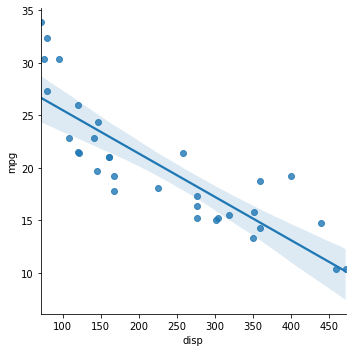

In [93]:
# 3. df1 이용해서 회귀선 그래프 그리기 
# seaborn 라이브러리 호출
import seaborn as sns
sns.lmplot(x='disp', y='mpg', data=df1)

In [117]:
df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   model     32 non-null     object 
 1   mpg       32 non-null     float64
 2   cyl       32 non-null     float64
 3   disp      32 non-null     float64
 4   hp        32 non-null     int64  
 5   drat      32 non-null     float64
 6   wt        32 non-null     float64
 7   qsec      32 non-null     float64
 8   vs        32 non-null     int64  
 9   am        32 non-null     int64  
 10  facility  32 non-null     int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 2.9+ KB
